In [49]:
using DelimitedFiles
using HDF5
using Random

using StatGeochem
using Plots; gr();
using Statistics

include("../src/bin.jl")
include("../src/config.jl")
include("../src/cracks.jl")
include("../src/utilities.jl")

areaAverage

In [2]:
perplex = "/Users/gailin/resources/perplex-stable/"
scratch = "../../perplexed_pasta/"

solutions = "O(HP)\nOpx(HP)\nOmph(GHP)\nGt(HP)\noAmph(DP)\nGlTrTsPg\nT\nB\nAnth\nChl(HP)"*
"\nBio(TCC)\nMica(CF)\nCtd(HP)\nIlHm(A)\nSp(HP)\nSapp(HP)\nSt(HP)\nfeldspar"*
"\nDo(HP)\nF\n"

solutions_nof = "O(HP)\nOpx(HP)\nOmph(GHP)\nGt(HP)\noAmph(DP)\nGlTrTsPg\nT\nB\nAnth\nChl(HP)"*
"\nBio(TCC)\nMica(CF)\nCtd(HP)\nIlHm(A)\nSp(HP)\nSapp(HP)\nSt(HP)\nfeldspar"*
"\nDo(HP)\n"

fluid_endmembers = "abL\nanL\ndiL\nenL\nfaL\nfliq\nfoL\nkspL\nmliq\nqL\nsiL\nq8L\nfa8L\nfo8L\nsil8L\n"

npoints = 50

50

In [3]:
compositions = readdlm("../data/remote/no_qL/bsr_ignmajors_1.csv", ',')

all_seismic = []
all_modes = []

for i in rand(1:size(compositions,1), 200)
    comp = compositions[i, 2:length(COMPOSITION_ELEMENTS)+1]
    tc1 = compositions[i,findfirst(isequal("geotherm"),PERPLEX_ELEMENTS)]
    layers = compositions[i,findfirst(isequal("upper"),PERPLEX_ELEMENTS):findfirst(isequal("lower"),PERPLEX_ELEMENTS)]
    
    geotherm = 550.0/tc1/dpdz
    P_range = [1, ceil(Int,layers[1]*dpdz)] # run to base of upper crust. 
    
    # Run perplex
    perplex_configure_geotherm(perplex, scratch, comp, PERPLEX_COMPOSITION_ELTS,
         P_range, 273.15, geotherm, dataset="hpha02ver.dat", solution_phases=solutions_nof,
         excludes=fluid_endmembers, index=1, npoints=npoints)
    seismic = perplex_query_seismic(perplex, scratch, index=1)
    modes = perplex_query_modes(perplex, scratch, index=1)

    push!(all_seismic, seismic)
    push!(all_modes, modes)
end

Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition
Built problem definition


In [53]:
function invmean(a)
    return 1/(nanmean(1 ./ a))
end 

ave_porosity = fill(0.0, length(all_seismic))
ave_crack_props = fill(0.0, (length(all_seismic), 3))
cracked_props = fill(0.0, (length(all_seismic), 3))
for (i, s) in enumerate(all_seismic)
    print("$(i)...")
    these_props = fill(0.0, (length(s["P(bar)"]), 3))
    these_cracks = RunningMean()
    for (j, z) in enumerate([p/dpdz for p in s["P(bar)"]])
        porosity = porosityFromDepth(z)
        crack = CrackProfile(cracked_properties, 0, 0, porosity, "d", "crack")
        these_props[j,:] = [apply_cracking(s["rho,kg/m3"][j], s["vp,km/s"][j], s["vp/vs"][j],
                crack)...]
        mean!(these_cracks, porosity)
    end 
    ave_porosity[i] = these_cracks.m
    ave_crack = CrackProfile(cracked_properties, 0, 0, these_cracks.m, "d", "crack")
    ave_crack_props[i,:] = [apply_cracking(invmean(s["rho,kg/m3"]), invmean(s["vp,km/s"]), 
        invmean(s["vp/vs"]), ave_crack)...]
    cracked_props[i,:] = [invmean(these_props[:,p]) for p in 1:3]
end 

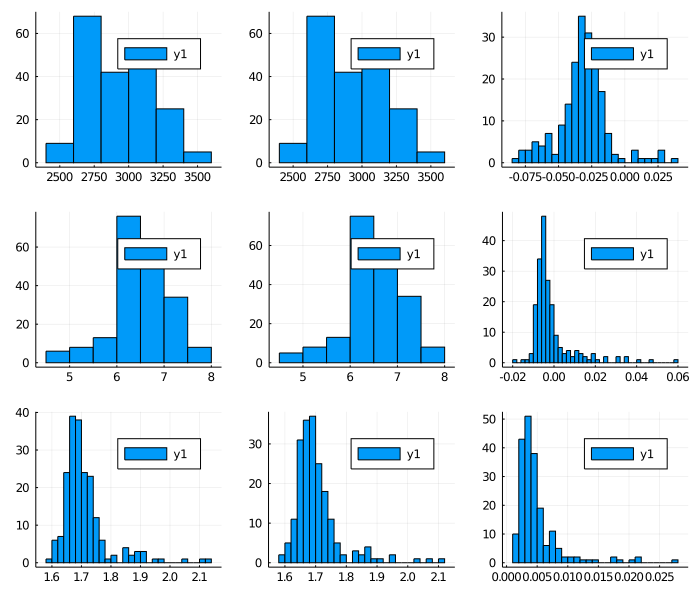

In [54]:
h1 = histogram(cracked_props[:,1])
ha1 = histogram(ave_crack_props[:,1])
dif1 = histogram(cracked_props[:,1] .- ave_crack_props[:,1])
h2 = histogram(cracked_props[:,2])
ha2 = histogram(ave_crack_props[:,2])
dif2 = histogram(cracked_props[:,2] .- ave_crack_props[:,2])
h3 = histogram(cracked_props[:,3])
ha3 = histogram(ave_crack_props[:,3])
dif3 = histogram(cracked_props[:,3] .- ave_crack_props[:,3])

plot(h1, ha1, dif1, h2, ha2, dif2, h3, ha3, dif3, layout=(3,3), size=(700,600))

Calculating the effect of average cracks in the upper crust, as opposed to averaging calculated effect of cracks in the upper crust, results in lower rho and vp but higher vp/vs; however, these effects are small as a \% of the variables involved. 

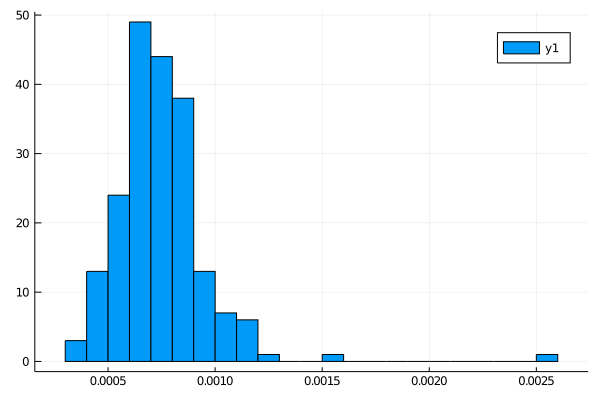

In [55]:
histogram(ave_porosity)

In [56]:
median(ave_porosity)

0.0007182785358212786

In [57]:
std(ave_porosity)

0.00022093737766718408

In [50]:
profiles = [random_upper_crust() for i in 1:10]

10-element Array{CrackProfile,1}:
 CrackProfile(cracked_properties, 976.9801869843902, 2.408780855809367, 2.955966306394853e-6, "w", "crack")
 CrackProfile(cracked_properties, 977.1953891306227, 2.643135906768897, 0.0, "w", "crack")                 
 CrackProfile(cracked_properties, 0, 0, 0.0, "d", "crack")                                                 
 CrackProfile(cracked_properties, 0, 0, 1.5374357328102022e-6, "d", "crack")                               
 CrackProfile(cracked_properties, 0, 0, 0.0, "d", "crack")                                                 
 CrackProfile(cracked_properties, 0, 0, 0.0, "d", "crack")                                                 
 CrackProfile(cracked_properties, 0, 0, 3.7306909520317382e-6, "d", "crack")                               
 CrackProfile(cracked_properties, 0, 0, 1.4466241915208662e-6, "d", "crack")                               
 CrackProfile(cracked_properties, 0, 0, 2.54655038774407e-7, "d", "crack")                            

In [52]:
typeof(Array{Crack,1}(profiles))

Array{Crack,1}